## Problem - Customer Churn

Let's build the diabetes prediction model.

Here, you are going to predict diabetes using the Logistic Regression Classifier.

Let's first load the required Pima Indian Diabetes dataset using the pandas' read CSV function. You can download data from the following link: https://www.kaggle.com/uciml/pima-indians-diabetes-database or select a dataset from DataCamp: https://www.datacamp.com/workspace/datasets. The ready-to-use dataset provides you the option to train the model on DataCamp's Workspace, which is a free Jupyter notebook on the cloud. 

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Get Data

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = pd.read_csv("diabetes.csv")
#df = df.query("Contract == 'Month-to-month'")

In [3]:
df 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Training-Testing Split

In [4]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.iloc[:,:-1]
y = df['Outcome']
#y = y.map(dict(Yes=1, No=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify = y)

In [5]:
print(len(X_train), len(X_test))

614 154


Inspect distribution of target in training and test set

In [6]:
print(pd.Series(y_train).value_counts(normalize = True))
print(pd.Series(y_test).value_counts(normalize = True))

Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64


### Model training with sklearn

In [7]:
# Define Model
from sklearn import linear_model
model = linear_model.LogisticRegression(fit_intercept = True)

# Train Model
model.fit(X_train, y_train)

# Show model
print(model.coef_)

# Model Performance (Accuracy)
print(model.score(X_train, y_train))

[[ 0.12658616  0.03504991 -0.01430186  0.0024515  -0.00159039  0.08700016
   0.56035217  0.00692517]]
0.7752442996742671


c:\Users\Rina\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

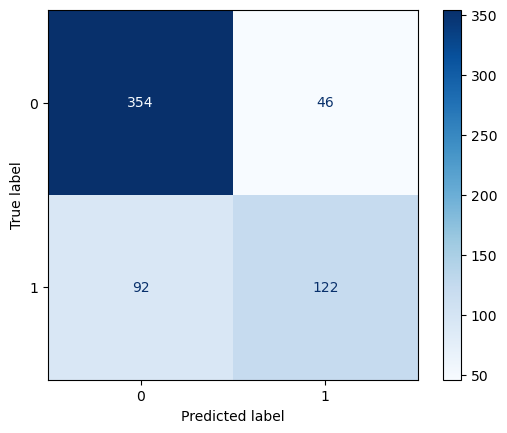

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels = model.classes_)
plt = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model .classes_)
plt.plot(cmap = "Blues");

### Accuracy Metric

In [8]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_train)
accuracy_score(y_pred, y_train)

0.7752442996742671

### F1 Metric

In [9]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_train)
f1_score(y_pred, y_train)

0.6387434554973822